In [ ]:
# ..... find markers for each cluster? ..... #

In [2]:
library(Seurat)
library(dplyr)

In [22]:
# load list of orthologs
om = read.delim('human_turtle_orthologs_biomart.txt', sep = '\t')
colnames(om) <- c('human', 'turtle', 'LCA', 'homology_type', 'orthology_confidence')
om <- om[om[,1]!='' & om[,2]!='' & om$homology_type=='ortholog_one2one',]
dim(om)
om[1,]

[1] 13091     5

human  turtle LCA        homology_type    orthology_confidence
11 MT-ND2 ND2    Vertebrata ortholog_one2one 1

In [3]:
papers = c('Asp', 'Feng', 'Hill', 'Knight-Schrijver', 'Mantri', 'Qiu', 
           'Farah', 'Kanemaru', 'Xu', 'Cui')

cols1 = c('predicted', 'predicted', 'predicted', 'class', 'predicted', 'class',
          'predicted', 'class', 'predicted', 'predicted')

In [4]:
# get list of samples
stages = rep(c('stage14', 'stage17', 'stage21'), each = 3)
samples = paste0('sample', c('4', '7', '8A', '3_Triangle', '5B', '5Y', '1A', '1B', '2'))

In [5]:
# load data
id = 1
file0 = paste0(stages[id], '_', samples[id], '_data.rds')
paste0(stages[id], '_', samples[id])

sce = readRDS(file0)
sce

[1] "stage14_sample4"

An object of class Seurat 
26985 features across 9211 samples within 1 assay 
Active assay: RNA (26985 features, 2000 variable features)
 3 layers present: counts, data, scale.data
 2 dimensional reductions calculated: pca, umap

In [6]:
files0 = list.files('annotations/')
files1 = files0[grep(paste0(stages[id], '_', samples[id]), files0)]
files1

[1] "stage14_sample4_Asp_celltypes.csv"               
 [2] "stage14_sample4_Cui_celltypes.csv"               
 [3] "stage14_sample4_Farah_celltypes.csv"             
 [4] "stage14_sample4_Feng_celltypes.csv"              
 [5] "stage14_sample4_Hill_celltypes.csv"              
 [6] "stage14_sample4_Kanemaru_celltypes.csv"          
 [7] "stage14_sample4_Knight-Schrijver_celltypes.csv"  
 [8] "stage14_sample4_Mantri_celltypes.csv"            
 [9] "stage14_sample4_Mantri_Seurat_label_transfer.csv"
[10] "stage14_sample4_Qiu_celltypes.csv"               
[11] "stage14_sample4_Xu_celltypes.csv"

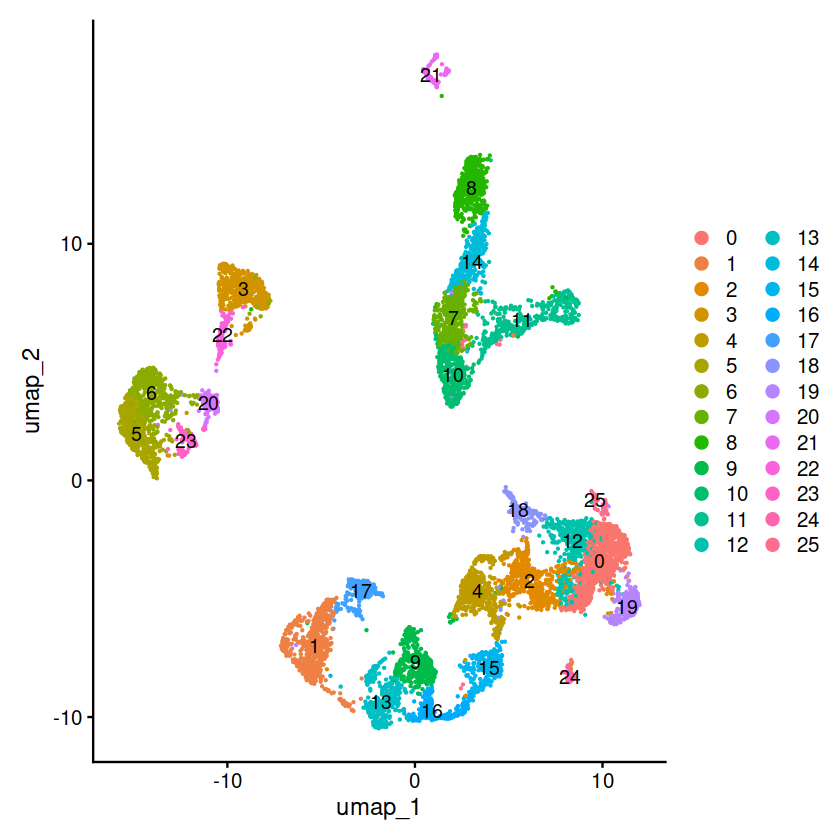

In [7]:
DimPlot(sce, reduction = 'umap', label = T)

In [8]:
Idents(sce) <- "seurat_clusters"

In [40]:
# top markers
markers <- FindMarkers(object = sce, ident.1 = 8, only.pos = T)

# take marker gene which is not NA in human or turtle
markers$gene = om$human[match(rownames(markers), om$turtle)]
ids1 = which(is.na(markers$gene))
markers$gene[ids1] = rownames(markers)[ids1]
head(markers)

p_val         avg_log2FC pct.1 pct.2 p_val_adj     gene        
LOC101939562  0.000000e+00 4.183937   0.996 0.250  0.000000e+00 LOC101939562
NECAB2        0.000000e+00 4.446846   0.825 0.141  0.000000e+00 NECAB2      
SLC25A37      0.000000e+00 3.803450   0.937 0.269  0.000000e+00 SLC25A37    
LOC101935553  0.000000e+00 3.857872   0.854 0.192  0.000000e+00 LOC101935553
SLC4A1       4.644300e-300 2.672026   0.980 0.267 1.253264e-295 SLC4A1      
LOC101935566 9.040763e-290 4.113536   0.706 0.131 2.439650e-285 LOC101935566

In [41]:
markers$gene[1:50]

[1] "LOC101939562" "NECAB2"       "SLC25A37"     "LOC101935553" "SLC4A1"      
 [6] "LOC101935566" "MFSD2B"       "LOC101941273" "EPB41"        "SPTB"        
[11] "STAB2"        "LOC101954001" "CALCR"        "KEL"          "MAPT"        
[16] "TFRC"         "TAFA2"        "TMC5"         "LOC101947665" "SYTL2"       
[21] "MAP3K15"      "REEP1"        "FRYL"         "ELL2"         "NRBP2"       
[26] "RHAG"         "LOC112059669" "NT5E"         "ADA"          "ACE"         
[31] "FAM53A"       "LOC112059642" "TRIM2"        "SLC25A21"     "LOC101933723"
[36] "SORBS2"       "SLC1A4"       "FRRS1"        "LOC101939156" "MBNL1"       
[41] "LOC101952655" "GGT5"         "CTBP1"        "LOC101935401" "LOC101953694"
[46] "SLC9A3R2"     "TUBB1"        "CCND3"        "LOC101950965" "LOC101945939"

In [43]:
which(rownames(markers)=='HBA')

integer(0)

In [33]:
# MYH7 in atria, IRX4 in ventricles, ACTC1 and GJA5 in both - Mantri et al
paste0('MYH7   ', which(rownames(markers)=='MYH7'))
paste0('IRX4   ', which(rownames(markers)=='IRX4'))

[1] "MYH7   "

[1] "IRX4   2"

In [13]:
which(rownames(markers)=='DCN')
which(rownames(markers)=='MYH11')
# which(rownames(markers)=='CDH5')

integer(0)

integer(0)

In [49]:
# get df of classifications and annos
df = c()

for(ii in 1:length(papers)){
    temp = read.delim(paste0('annotations/', stages[id], '_', samples[id], '_', papers[ii], '_celltypes.csv'), sep = ',')
    temp$study = papers[ii]
    temp$cluster = sce$seurat_clusters
    temp$anno = temp[,match(cols1[ii], colnames(temp))]
    df = rbind(df, temp[,c('study', 'cluster', 'anno')])
}

df$ctype = paste0(df$study, '_', df$anno)
head(df)

study cluster anno                          
stage14_sample4_AAACCCACAATGAACA-1 Asp   0       Endothelium Pericytes Adventia
stage14_sample4_AAACCCATCGCTATTT-1 Asp   19      Capillary endothelium         
stage14_sample4_AAACCCATCTTAATCC-1 Asp   2       Fibroblast connective         
stage14_sample4_AAACGAAAGCAATTAG-1 Asp   16      Fibroblast connective         
stage14_sample4_AAACGAAAGCTCGACC-1 Asp   10      Erythrocytes                  
stage14_sample4_AAACGAACAAACCGGA-1 Asp   1       SMCs                          
                                   ctype                             
stage14_sample4_AAACCCACAATGAACA-1 Asp_Endothelium Pericytes Adventia
stage14_sample4_AAACCCATCGCTATTT-1 Asp_Capillary endothelium         
stage14_sample4_AAACCCATCTTAATCC-1 Asp_Fibroblast connective         
stage14_sample4_AAACGAAAGCAATTAG-1 Asp_Fibroblast connective         
stage14_sample4_AAACGAAAGCTCGACC-1 Asp_Erythrocytes                  
stage14_sample4_AAACGAACAAACCGGA-1 Asp_SMCs

In [50]:
table(sce$seurat_clusters)


  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19 
855 662 520 517 516 513 489 477 446 445 396 390 384 359 327 306 243 226 226 223 
 20  21  22  23  24  25 
148 146 140 122  70  65 

In [56]:
df %>% filter(cluster == 24) %>%
group_by(ctype) %>% reframe(count = n()) %>% arrange(-count) 

ctype                                         count
1  Cui_C4 (EC)                                   69   
2  Qiu_Endothelium                               68   
3  Feng_endocardial_ec                           63   
4  Kanemaru_endothelial cell of lymphatic vessel 63   
5  Mantri_Endocardial cells                      52   
6  Asp_Endothelium Pericytes Adventia            49   
7  Hill_EndoC                                    43   
8  Knight-Schrijver_Endothelial_Venous           34   
9  Farah_BEC                                     28   
10 Xu_fibroblast-1                               27   
11 Farah_Endocardial                             26   
12 Xu_vascular endothelium-2                     25   
13 Knight-Schrijver_Endocardial                  24   
14 Asp_Capillary endothelium                     19   
15 Farah_LEC                                     14   
16 Knight-Schrijver_Endothelial_Other            11   
17 Hill_EndoV                                    10   
18 Mantri_Vascular endothelial cells              9   
19 Xu_fibroblast-8                                8   
20 Kanemaru_endothelial cell                      7   
21 Hill_CP2                                       6   
22 Xu_endothelium like                            5   
23 Feng_fibroblast-like                           4   
24 Hill_EPiC                                      4   
25 Mantri_Mural cells                             4   
26 Feng_vascular_ec                               3   
27 Hill_Mes                                       3   
28 Mantri_Epi-epithelial cells                    3   
29 Asp_SMCs                                       2   
30 Farah_Fibro                                    2   
31 Hill_CP1                                       2   
32 Mantri_Fibroblast cells                        2   
33 Xu_arterial endothelium                        2   
34 Cui_C3 (Fibroblast-like cell)                  1   
35 Hill_CM                                        1   
36 Hill_CP3                                       1   
37 Knight-Schrijver_Endothelial_Arterial          1   
38 Qiu_Mesoderm                                   1   
39 Qiu_Neural_crest_PNS_glia                      1   
40 Xu_cardiomyocyte-1                             1   
41 Xu_epithelium-2                                1   
42 Xu_epithelium-3                                1

In [41]:
ids = which(sce$seurat_clusters==1)
table(temp$predicted[ids])


          Cardiomyocytes-2          Endocardial cells 
                        85                        732 
      Epi-epithelial cells      Epi-mesenchymal cells 
                         2                          1 
          Fibroblast cells                Mural cells 
                       203                        135 
               Valve cells Vascular endothelial cells 
                         2                         26 